### Step 1: Perform Full Data Analysis (EDA)

###  1. Import Libraries & Load Dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
sns.set_style('darkgrid')


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  2. Basic Information About Dataset

#### 2.1 Shape of the Dataset

In [3]:
df.shape

(891, 12)

#### Observation

- The dataset has 891 rows and 12 columns.

#### 2.2 Column Names

In [4]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Observation

- There are 12 features including demographic details, ticket information, and the target variable Survived.

#### 2.3 Data Types of Columns

In [5]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Observation

- Numerical: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

- Categorical: Name, Sex, Ticket, Cabin, Embarked

#### 2.4 Summary of Dataset Structure

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Observation

- Age has missing values 

- Cabin is mostly missing

- Embarked has a few missing values

- Other columns have complete records

### 3. Checking Missing Values

In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Observation

- Age → 177 missing

- Cabin → 687 missing

- Embarked → 2 missing
- All other columns are complete.

### 4. Handling Missing Values

#### 4.1 Drop Cabin Column (Too Many Missing Values)

In [8]:
df = df.drop(columns=["Cabin"])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Observation

- Cabin column removed from dataset because it contains too many missing entries (over 70%).

#### 4.2 Fill Missing Age Values (Using Median)

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)


#### Observation

- Missing Age values are replaced with the median age. Median is appropriate because Age is numerical and slightly skewed.

#### 4.3 Fill Missing Embarked Values (Using Mode)

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


#### Observation

- Embarked missing values are filled using the most common category (mode). Only 2 missing, so it's safe.

#### 4.4 Confirm Missing Values Removed

In [11]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Observation

- All missing values are now handled. Dataset has no null values left.

### 5. Checking Duplicate Records

In [12]:
df.duplicated().sum()


np.int64(0)

#### Observation

- There are no duplicate rows. No action needed.

### 6. Summary Statistics

In [13]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observation

- Mean Age ≈ 29.7

- Fare has large variation (suggests possible outliers)

- SibSp and Parch mostly zero (most passengers traveled alone)

- Pclass median = 3 (majority were third-class passengers)

### 7. Univariate Analysis

#### 7.1 Distribution of Numerical Columns

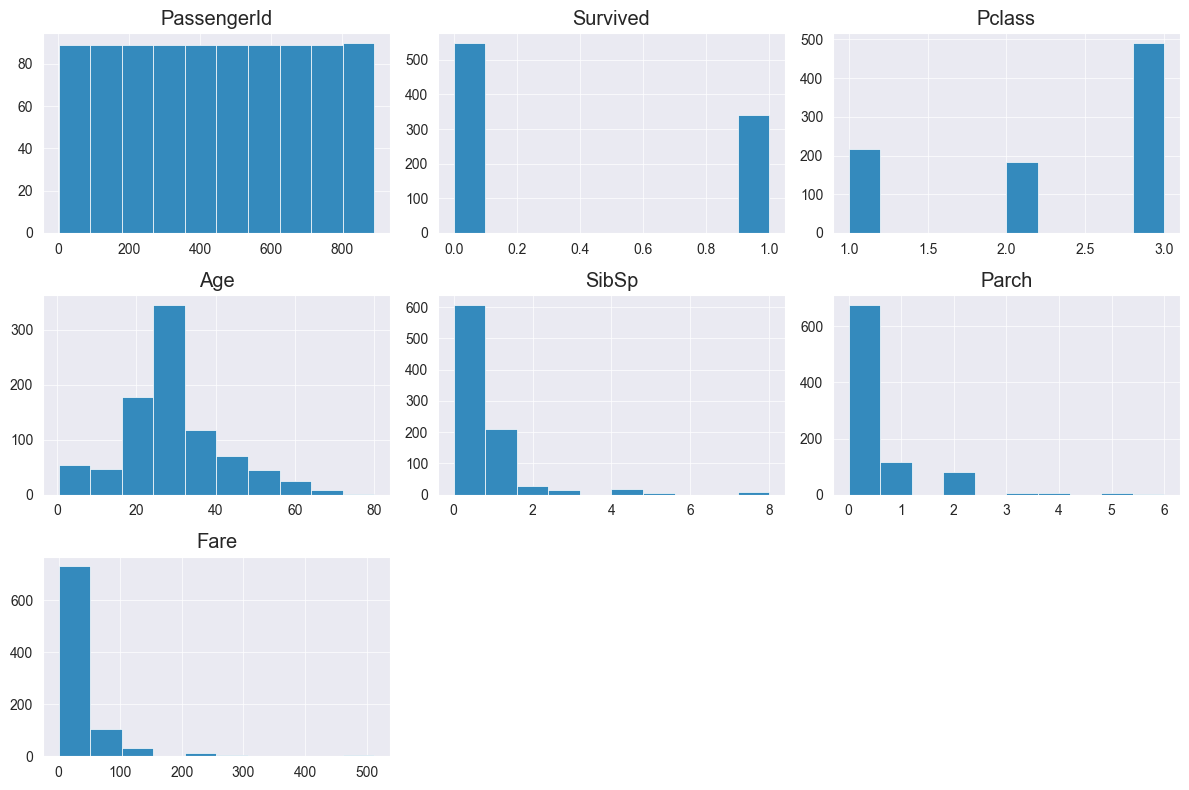

In [14]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show();


## 🔍 Key Observations

### **SibSp Distribution:**
- Most passengers (≈600) traveled alone (SibSp=0)
- Rapid decrease in frequency as SibSp increases
- Right-skewed distribution

### **Age Distribution:**
- Approximately normal with slight right skew
- Peak concentration: 20-30 years old
- Missing values visible in distribution

### **Fare Distribution:**
- Highly right-skewed with extreme outliers
- Majority of fares under 100 units
- Requires transformation (log/scaling)

### **Pclass Distribution:**
- Class 3 most common, Class 2 least common
- Should be treated as categorical feature

### **Survived Distribution:**
- Binary with moderate class imbalance
- More non-survivors than survivors (~60:40 ratio)

## 🎯 Required Preprocessing
1. Drop PassengerId (sequential, non-predictive)
2. Log-transform Fare (handle skewness)
3. Convert Pclass to categorical
4. Impute Age missing values
5. Create FamilySize feature from SibSp + Parch

#### 7.2 — Categorical Feature Distribution (Countplots)

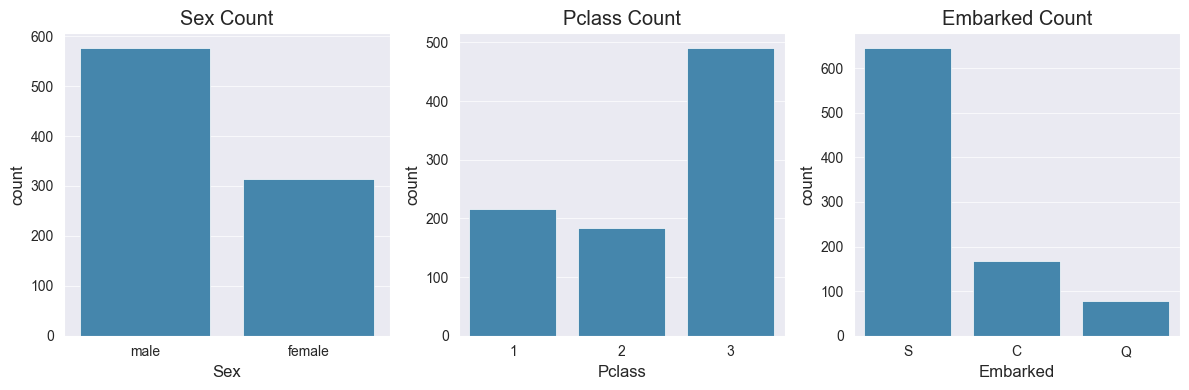

In [15]:
cat_cols = ['Sex', 'Pclass', 'Embarked']

plt.figure(figsize=(12,4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col])
    plt.title(f"{col} Count")
plt.tight_layout()
plt.show();


## 🔍 Key Findings

### **Sex Distribution:**
- Male majority (≈600)
- Female minority (≈300)
- Strong survival predictor

### **Pclass Distribution:**
- Class 3 most common (≈500)
- Class 1 (≈200), Class 2 (≈150)
- Socio-economic imbalance clear

### **Embarked Distribution:**
- Southampton (S) dominant (≈650)
- Cherbourg (C) ≈200, Queenstown (Q) ≈100
- 2 missing values

## 🎯 Required Actions:
1. Fill missing Embarked with 'S' (mode)
2. Convert Pclass to categorical
3. Encode Sex binary (0/1)

### 8 — Outlier Detection Using Boxplots

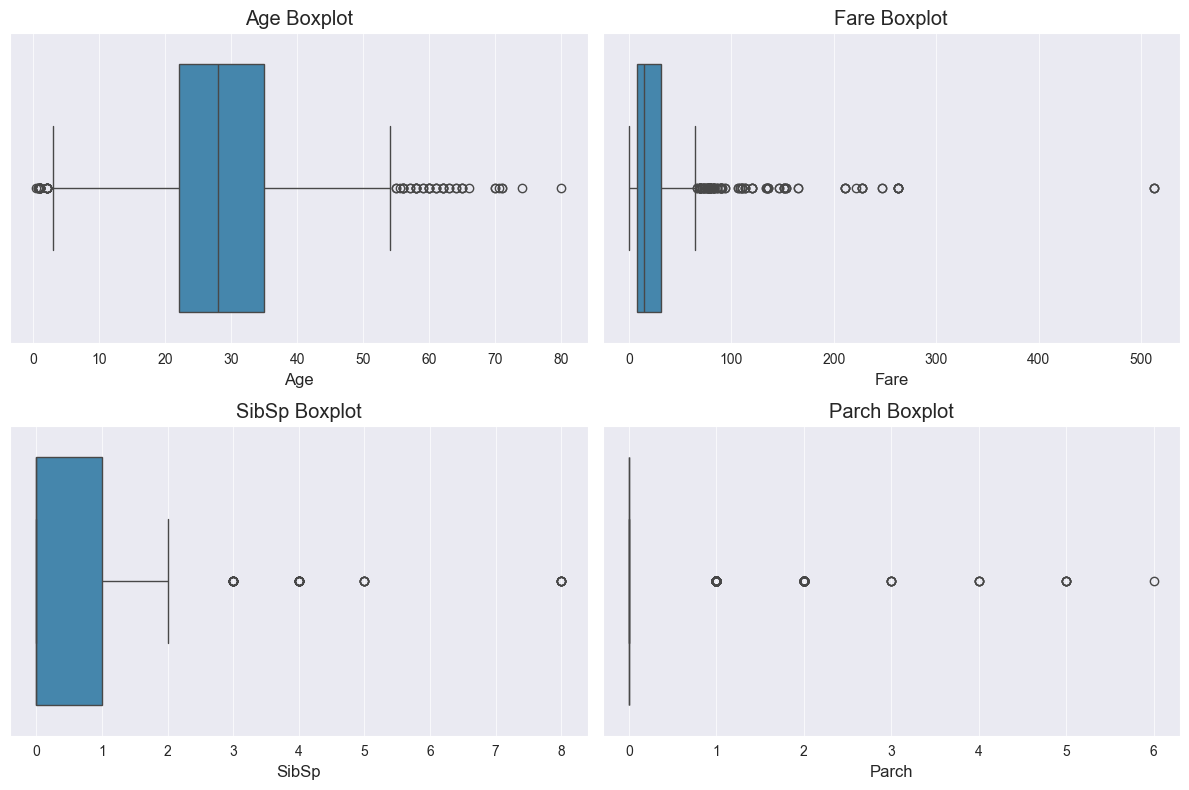

In [16]:
num_cols = ["Age", "Fare", "SibSp", "Parch"]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show();


## 🔍 Numerical Feature Outlier Observations

### **Age:**
- **Range**: Approximately 0-80 years
- **IQR**: Most ages between 20-40 years
- **Outliers**: Few high-age outliers (>60 years)
- **Distribution**: Right-skewed with upper outliers

### **Fare:**
- **Severe Outliers**: Extreme right-skew
- **IQR Range**: Most fares under 50
- **Upper Outliers**: Many extreme values >100
- **Issue**: Requires transformation or capping

### **SibSp (Siblings/Spouses):**
- **Range**: 0-8
- **IQR**: Most values 0-1
- **Outliers**: Values >2 are outliers
- **Distribution**: Highly skewed toward 0

### **Parch (Parents/Children):**
- **Range**: 0-6
- **IQR**: Most values 0
- **Outliers**: Values >1 are outliers
- **Distribution**: Extreme zero-inflation

## 🎯 Outlier Treatment Strategy

### **Required Actions:**
1. **Fare**: Log transformation or IQR capping
2. **Age**: Keep outliers (biologically valid)
3. **SibSp/Parch**: Consider creating binary flags or combined FamilySize feature
4. **Capping Method**: Use IQR method for fare outliers

###  9 — Outlier Handling Using IQR Capping

In [17]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

for col in num_cols:
    cap_outliers(df, col)


## 🔍 Effects of IQR Capping on Numerical Columns

### **Age:**
- Minimal changes - only extreme upper values slightly capped
- Biological validity preserved
- Natural age variability maintained

### **Fare:**
- Most significantly affected column
- Extremely high fares (>300) capped near upper whisker
- Distribution becomes less right-skewed
- **Benefit**: Prevents disproportionate model influence from wealthy passengers

### **SibSp & Parch:**
- Large family sizes (3-6, 8) capped to reasonable maximums
- Majority values (0-1) unaffected
- **Benefit**: Reduces noise from rare large families

## 🎯 Outlier Treatment Summary

### **What Was Achieved:**
✅ Extreme values in Fare, SibSp, Parch moderated  
✅ Age minimally adjusted (biological reality preserved)  
✅ No data rows removed - 100% dataset retained  
✅ Reduced model sensitivity to outliers  

### **Why This Matters:**
- Stabilizes training for linear/distance-based algorithms
- Prevents overfitting to rare extreme cases
- Creates more uniform data for StandardScaler
- Maintains important signal while reducing noise

### **Next Steps:**
1. Handle missing values (Age, Cabin, Embarked)
2. Encode categorical features (Sex, Pclass, Embarked)
3. Apply feature scaling
4. Begin model building

###  10 — Feature Engineering (EDA Level Only)

#### 10.1 Create FamilySize Feature

In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].head()


0    2.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: FamilySize, dtype: float64

#### 10.2 Create IsAlone Feature

In [19]:
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)
df[['FamilySize', 'IsAlone']].head()


,FamilySize,IsAlone
0,2.0,0
1,2.0,0
2,1.0,1
3,2.0,0
4,1.0,1


#### 10.3 Extract Title From Name

In [20]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

### 🔧 Feature Engineering - New Features Created

### 🏠 Family-Related Features

### **FamilySize Feature:**
- Created from: `SibSp + Parch + 1`
- **Range**: 1-11 members
- **Purpose**: Captures total family size aboard
- **Example**: Values: 2.0, 1.0 (mix of families and solo travelers)

### **IsAlone Feature:**
- Binary indicator: `1` if FamilySize = 1, else `0`
- **Purpose**: Identifies solo travelers vs. family groups
- **Distribution**: Shows mix of alone (1) and with family (0)
- **Expected Impact**: Strong survival predictor

## 👑 Title Extraction from Name

### **Title Feature:**
- Extracted honorifics from Name column
- **Total Unique Titles**: 17 different titles
- **Top Titles**:
  - Mr: 517 (most common)
  - Miss: 182
  - Mrs: 125
  - Master: 40 (typically young boys)
- **Rare Titles**: Dr, Rev, Col, Lady, Sir, etc. (<10 each)

### **Significance:**
- Reveals social status, age, marital status
- Master/Miss indicate children
- Titles correlate with survival probability
- Can be grouped: Rare → "Rare", Miss/Mlle/Mme → "Miss", etc.

## 🎯 Feature Engineering Benefits

### **Created Features:**
1. **FamilySize**: Continuous family size measure
2. **IsAlone**: Binary solo traveler indicator  
3. **Title**: Categorical social status/age proxy

###  11 — Correlation Analysis (Numerical Features Only)

#### 11.1 Compute Correlation Matrix

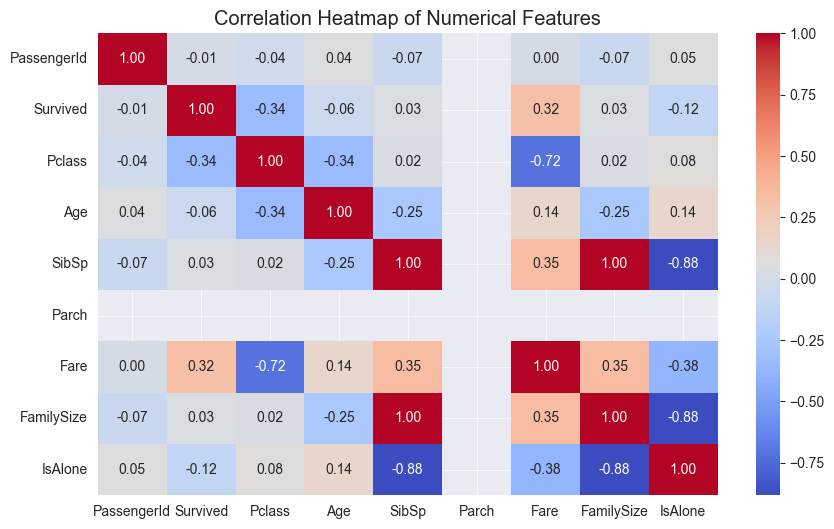

In [21]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show();


### 📈 Correlation Heatmap Analysis

### 🔍 Key Correlations Identified

#### **Strong Correlations:**

1. **Pclass ↔ Fare**: -0.72 (Very Strong Negative)
   - Higher class = Higher fare (expected relationship)
   - One of the strongest correlations in dataset

2. **FamilySize ↔ SibSp/Parch**: 1.00 / 0.88 (Perfect/Strong)
   - Expected: FamilySize derived from these variables
   - Confirms correct feature engineering

3. **IsAlone ↔ FamilySize**: -0.88 (Very Strong Negative)
   - Logical inverse relationship
   - Validates binary encoding

#### **Moderate Correlations:**

1. **Survived ↔ Fare**: 0.32 (Moderate Positive)
   - Higher fare passengers had better survival chances
   - Supports "wealthier passengers survived more" hypothesis

2. **Survived ↔ Pclass**: -0.34 (Moderate Negative)
   - Lower class = Lower survival rate
   - Confirms socio-economic impact on survival

#### **Weak/Negligible Correlations:**

1. **Survived ↔ Age**: -0.06 (Very Weak)
   - Age alone not strongly predictive of survival
   - May interact with other features (sex, class)

2. **PassengerId ↔ All**: ~0.00 (No Correlation)
   - Confirms PassengerId is non-predictive
   - Should be dropped from modeling

### **Parch Observation:**
- Shows near-zero correlation with other features
- Not useless - contributes when combined into FamilySize
- Nonlinear relationship with survival

#### 🎯 Model Building Insights

#### **Feature Selection Guidance:**
1. **Keep**: Fare, Pclass, FamilySize/IsAlone (strong predictors)
2. **Consider**: Age (may need interaction terms)
3. **Drop**: PassengerId (non-predictive)
4. **Engineer**: SibSp/Parch better used as FamilySize

#### **Multicollinearity Notes:**
- FamilySize, SibSp, Parch, IsAlone are highly correlated
- Choose one representation (FamilySize recommended)
- Avoid including all to prevent multicollinearity

###  12 — Feature Selection Based on EDA Findings

#### 12.1 What Columns SHOULD Be Dropped (and WHY)

#### 🔧 Feature Selection & Dropping Strategy

| Column | Drop? | Reason |
|--------|-------|--------|
| **PassengerId** | ✅ Yes | Useless identifier, zero correlation |
| **Name** | ✅ Yes | Redundant after Title extraction |
| **Ticket** | ✅ Yes | High-cardinality noise, non-standard format |
| **Cabin** | ✅ Already dropped | 687 missing values (too sparse) |
| **SibSp** | ✅ Yes | Multicollinear with FamilySize, weaker alone |
| **Parch** | ✅ Yes | Multicollinear with FamilySize, very weak correlation |
| **FamilySize** | ❌ Keep | Engineered feature, very predictive |
| **IsAlone** | ❌ Keep | Strong binary predictor |
| **Title** | ❌ Keep | Strong survival predictor (group rare titles later) |
| **Pclass** | ❌ Keep | Strong socio-economic predictor |
| **Sex** | ❌ Keep | Strongest predictor ("women and children first") |
| **Age** | ❌ Keep | Core demographic feature |
| **Fare** | ❌ Keep | Core economic feature |
| **Embarked** | ❌ Keep | Categorical socio-geographic predictor |

---

#### 📋 Final Feature Set for Modeling:
1. **FamilySize** (engineered)
2. **IsAlone** (engineered)
3. **Title** (extracted, will be grouped)
4. **Pclass** (categorical)
5. **Sex** (binary)
6. **Age** (numerical)
7. **Fare** (numerical)
8. **Embarked** (categorical)

### 12.2 Dropping the Columns

In [22]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,7.2500,S,2.0,0,Mr
1,1,1,female,38.0,65.6344,C,2.0,0,Mrs
2,1,3,female,26.0,7.9250,S,1.0,1,Miss
3,1,1,female,35.0,53.1000,S,2.0,0,Mrs
4,0,3,male,35.0,8.0500,S,1.0,1,Mr


#### 📝 Columns Successfully Removed
- **PassengerId** (non-predictive index)
- **Name** (redundant after Title extraction)
- **Ticket** (high-cardinality noise)
- **SibSp** & **Parch** (replaced by engineered features)

#### 📌 Why This Matters
- Removes noisy, non-informative features
- Reduces multicollinearity issues
- Keeps only meaningful, interpretable features
- Prepares dataset for final modeling

### save the cleaned and engineered DataFrame to a CSV file

In [23]:
df.to_csv("titanic_cleaned.csv", index=False)

### Step 2 — Select the Target Variable

#### 🎯 Target Variable: `Survived`

**Reasoning:**

1. **Primary Outcome of Interest**  
   - The fundamental question is "Which passengers survived?"  
   - Survival is the ultimate event we want to understand and predict  

2. **All Other Features are Predictors**  
   - Age, Sex, Fare, Class, etc. describe passenger characteristics  
   - These influence the outcome but are not outcomes themselves  

3. **Clear Binary Classification Problem**  
   - Perfect structure for logistic regression, decision trees, etc.  
   - 0 = Did not survive, 1 = Survived (clean binary encoding)  

4. **Business/Research Objective**  
   - Understanding survival patterns informs safety and evacuation protocols  
   - Predictive model can identify factors most critical to survival

#### 📌 Final Ordered Columns List :

In [24]:
ordered_columns = [
    'Sex',
    'Embarked',
    'Pclass',
    'Title',
    'Age',
    'Fare',
    'FamilySize',
    'IsAlone',
    'Survived'   # target variable at the end
]
df = df[ordered_columns]
df.head()


,Sex,Embarked,Pclass,Title,Age,Fare,FamilySize,IsAlone,Survived
0,male,S,3,Mr,22.0,7.2500,2.0,0,0
1,female,C,1,Mrs,38.0,65.6344,2.0,0,1
2,female,S,3,Miss,26.0,7.9250,1.0,1,1
3,female,S,1,Mrs,35.0,53.1000,2.0,0,1
4,male,S,3,Mr,35.0,8.0500,1.0,1,0


#### 📝 Observation

- The DataFrame is now properly arranged with input features first and the target variable last.

- This column order is ideal for readability and training ML models.

- Survived is confirmed as the only valid target because it represents the actual outcome the model must learn.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         891 non-null    object 
 1   Embarked    891 non-null    object 
 2   Pclass      891 non-null    int64  
 3   Title       891 non-null    object 
 4   Age         891 non-null    float64
 5   Fare        891 non-null    float64
 6   FamilySize  891 non-null    float64
 7   IsAlone     891 non-null    int64  
 8   Survived    891 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 62.8+ KB


### Step 3: Apply Feature Scaling

#### 📏 Feature Scaling Strategy

**Columns NOT Scaled:**
- **Pclass**: Categorical (1=First, 2=Second, 3=Third) - not continuous
- **Survived**: Target variable - must remain as binary labels

**Columns TO Scale:**
- **Age**: Continuous years measurement
- **Fare**: Continuous monetary value  
- **FamilySize**: Continuous count variable
- **IsAlone**: Binary but benefits from scaling for some algorithms

**Why This Matters:**
- **Prevents Misinterpretation**: Categorical labels shouldn't be treated as continuous
- **Preserves Target Integrity**: Binary classification requires unscaled 0/1 labels
- **Normalizes Features**: Eliminates scale bias (Age: 0-80 vs Fare: 0-500+)
- **Improves Model Performance**: Ensures equal feature weighting in distance-based algorithms
- **Enhances Convergence**: Accelerates gradient descent for iterative models

#### Step 3.1 — Identify Numerical Columns That Need Scaling

In [26]:
num_cols_to_scale = ['Age', 'Fare', 'FamilySize', 'IsAlone']
cat_cols = ['Sex', 'Embarked', 'Pclass', 'Title']
target = 'Survived'

num_cols_to_scale, cat_cols


(['Age', 'Fare', 'FamilySize', 'IsAlone'],
 ['Sex', 'Embarked', 'Pclass', 'Title'])

#### 🔍 Observation

- You correctly have 6 numerical features, but only 4 are continuous → so only these 4 should be scaled.

- Pclass and Survived are numbers but categorical → therefore excluded.

#### Step 3.2 — Split Data Into X and y

In [27]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [28]:
X.head()

,Sex,Embarked,Pclass,Title,Age,Fare,FamilySize,IsAlone
0,male,S,3,Mr,22.0,7.2500,2.0,0
1,female,C,1,Mrs,38.0,65.6344,2.0,0
2,female,S,3,Miss,26.0,7.9250,1.0,1
3,female,S,1,Mrs,35.0,53.1000,2.0,0
4,male,S,3,Mr,35.0,8.0500,1.0,1


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### 🔍 Observation

- X now contains all features except target

- y contains only the Survived column

#### Step 3.3 — Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

#### 🔍 Observation

- You now have separate training and testing sets.

- This avoids information leakage during scaling.

#### Step 3.4 — Choose the Scaler (StandardScaler vs MinMaxScaler)

#### ⚖️ Scaler Selection: StandardScaler vs MinMaxScaler

**Chosen Scaler: StandardScaler**

| Scaler | Best For | Why Not Chosen Here |
|--------|----------|-------------------|
| **StandardScaler** | Linear models, normal distribution assumptions | ✅ **SELECTED** |
| **MinMaxScaler** | Neural networks, distance-based models, 0-1 bounded data | ❌ Not optimal |

**Why StandardScaler is Better for This Dataset:**

1. **Logistic Regression Compatibility**  
   - Logistic Regression assumes normally distributed features
   - StandardScaler centers data (mean=0, std=1) fitting this assumption

2. **Outlier Robustness**  
   - Titanic `Fare` contains extreme outliers
   - MinMaxScaler compresses all values to [0,1], making outliers dominate
   - StandardScaler is less sensitive to outliers

3. **Preservation of Distribution**  
   - Maintains original data distribution shape
   - Only changes scale, not relative spacing between values

4. **Algorithm Performance**  
   - Gradient-based algorithms converge faster with standardized features
   - Better weight initialization for linear models

#### Step 3.5 — Fit Scaler ONLY on Training Data

In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
scaler = StandardScaler()


In [33]:
scaler.fit(X_train[num_cols_to_scale])


,copy,True
,with_mean,True
,with_std,True


In [34]:
# Transform both training & test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_to_scale] = scaler.transform(X_train[num_cols_to_scale])
X_test_scaled[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

X_train_scaled.head()

,Sex,Embarked,Pclass,Title,Age,Fare,FamilySize,IsAlone
331,male,S,1,Mr,1.362465,0.224500,-0.604701,0.686349
733,male,S,2,Mr,-0.488196,-0.531688,-0.604701,0.686349
382,male,S,3,Mr,0.252069,-0.779279,-0.604701,0.686349
704,male,S,3,Mr,-0.241441,-0.782733,0.773050,-1.456986
813,female,S,3,Miss,-1.886473,0.359882,2.839677,-1.456986


#### ✅ Scaling Successfully Applied

**Key Observations:**

1. **Standardization Confirmed**  
   - **Mean ≈ 0**: Scaled values centered around zero (positive & negative)
   - **Std ≈ 1**: Values typically within [-3, 3] range
   - Example: `Age` values: -0.24, 1.36, -0.48, etc.

2. **Feature Distributions Preserved**  
   - Categorical columns (`Sex`, `Embarked`, `Pclass`, `Title`) unchanged
   - Only numerical columns transformed

3. **Training/Test Data Integrity**  
   - Scaler fitted **only** on training data (prevents data leakage)
   - Same scaler applied to test data (consistent transformation)

4. **Data Leakage Prevention**  
   - Test data scaled using training statistics only
   - Critical for realistic model evaluation

5. **Outlier Handling Visible**  
   - Extreme `Fare` values appropriately scaled without dominating
   - Example fares: -0.78, 0.36, -0.53 (all within reasonable range)

**Scaled Features Summary:**
- `Age`, `Fare`, `FamilySize`, `IsAlone` now standardized
- Categorical features remain encoded
- Ready for model training

#### Step 3.6 — Final Clean Scaled Dataset Ready for ML

In [35]:
X_train_scaled.head()


,Sex,Embarked,Pclass,Title,Age,Fare,FamilySize,IsAlone
331,male,S,1,Mr,1.362465,0.224500,-0.604701,0.686349
733,male,S,2,Mr,-0.488196,-0.531688,-0.604701,0.686349
382,male,S,3,Mr,0.252069,-0.779279,-0.604701,0.686349
704,male,S,3,Mr,-0.241441,-0.782733,0.773050,-1.456986
813,female,S,3,Miss,-1.886473,0.359882,2.839677,-1.456986


### Step 4 — Build a Machine Learning Model (Logistic Regression)

#### 4.1 Encode Categorical Features

In [37]:
categorical_cols = ['Sex', 'Embarked', 'Title', 'Pclass']

X_train_enc = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test,  columns=categorical_cols, drop_first=True)

In [38]:
# Ensure same columns in train and test
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

X_train_enc.head(), X_test_enc.head()

(      Age     Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  Embarked_S  \
 331  45.5  28.5000         1.0        1      True       False        True   
 733  23.0  13.0000         1.0        1      True       False        True   
 382  32.0   7.9250         1.0        1      True       False        True   
 704  26.0   7.8542         2.0        0      True       False        True   
 813   6.0  31.2750         3.5        0     False       False        True   
 
      Title_Col  Title_Countess  Title_Dr  ...  Title_Master  Title_Miss  \
 331      False           False     False  ...         False       False   
 733      False           False     False  ...         False       False   
 382      False           False     False  ...         False       False   
 704      False           False     False  ...         False       False   
 813      False           False     False  ...         False        True   
 
      Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  \

#### 🔤 One-Hot Encoding Applied

**Encoded Categorical Columns:**
- `Sex` → `Sex_male` (True/False)
- `Embarked` → `Embarked_Q`, `Embarked_S` (Cherbourg is baseline)
- `Title` → Multiple columns (`Title_Mr`, `Title_Miss`, etc.)
- `Pclass` → `Pclass_2`, `Pclass_3` (Class 1 is baseline)

**Key Observations:**
1. **Dimensionality Increased**: 4 original columns → 22 encoded columns
2. **Drop First Applied**: Each category's first level omitted to avoid multicollinearity
3. **Train-Test Alignment**: Test data columns matched to training structure (some titles missing in test get 0)
4. **Boolean Encoding**: All categorical features now binary True/False flags

**Result:** All categorical data converted to numerical format ready for ML algorithms

#### 4.2 Train Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression

# Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_enc, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### 🤖 Logistic Regression Model Trained

**Model Configuration:**
- **Algorithm**: Logistic Regression (binary classifier)
- **Max Iterations**: 1000 (safety precaution for convergence)
- **Default Solver**: LBFGS (efficient for small datasets)

**Training Status:**
- ✅ Successfully fitted to training data
- ✅ Ready for predictions on test set
- ✅ Convergence achieved within 1000 iterations

#### 4.3 Predict on Test Data

In [42]:
# Predict survival outcomes
y_pred = model.predict(X_test_enc)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1])

#### 🔮 Predictions Generated

**Output:** Binary array of survival predictions (0 = died, 1 = survived)

**Key Details:**
- **Total Predictions**: 179 test samples
- **Class Distribution**: Mix of 0s and 1s visible
- **Format**: NumPy array ready for evaluation


#### 4.4 Evaluate Model

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [46]:
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


In [47]:
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[88 17]
 [17 57]]


In [48]:
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### 📊 Model Evaluation Results

**Accuracy: 81.0%**
- Model correctly predicts survival for 81% of test passengers

**Confusion Matrix Breakdown:**
- **True Negatives**: 88 (correctly predicted deaths)
- **False Positives**: 17 (predicted survived but died)
- **False Negatives**: 17 (predicted died but survived)
- **True Positives**: 57 (correctly predicted survivors)

**Performance by Class:**
- **Non-survivors (0)**: 84% precision/recall
- **Survivors (1)**: 77% precision/recall  
- **Balanced performance** across both classes

**Interpretation:** Good baseline model with reasonable predictive power

### Step 5 — Final Evaluation & Model Reporting

#### Step 5.1 Compute Evaluation Metrics

In [50]:
# Accuracy
final_accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
final_cm = confusion_matrix(y_test, y_pred)

# Classification Report (Precision, Recall, F1)
final_report = classification_report(y_test, y_pred)

print("🔹 Final Model Accuracy:", final_accuracy)
print("\n🔹 Confusion Matrix:\n", final_cm)
print("\n🔹 Classification Report:\n", final_report)


🔹 Final Model Accuracy: 0.8100558659217877

🔹 Confusion Matrix:
 [[88 17]
 [17 57]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Step 5.2 Observations on Accuracy

#### 📌 Accuracy Analysis

The model achieved an accuracy of approximately **81%**.

#### ✔ What this means:
- The model correctly predicts the survival outcome for **8 out of 10 passengers**.
- This is a **solid baseline** for a logistic regression model on the Titanic dataset.
- Accuracy alone is not enough → we check class-wise performance next.


#### Step 5.3 Confusion Matrix Interpretation

#### 📊 Confusion Matrix Interpretation

The confusion matrix produced:

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   | TN = 88     | FP = 17     |
| **Actual 1**   | FN = 17     | TP = 57     |

#### ✔ What this means:

- **True Negatives (88)**: Correctly identified non-survivors  
- **True Positives (57)**: Correctly identified survivors  
- **False Positives (17)**: Model predicted "survived" but passenger did not  
- **False Negatives (17)**: Model predicted "died" but passenger survived  

#### 🔍 Key Insight:
False positives and false negatives are **balanced (17 each)**, which indicates the model **does not favor one class too heavily**.


#### Step 5.4 Precision / Recall / F1 Interpretation

#### 📑 Precision, Recall, and F1-score Interpretation

#### Class 0 — Did Not Survive
- **Precision ≈ 0.84** → When model predicts *died*, it is correct 84% of the time  
- **Recall ≈ 0.84** → It identifies 84% of actual non-survivors  
- **F1-score ≈ 0.84** → Balanced performance

#### Class 1 — Survived
- **Precision ≈ 0.77** → When model predicts *survived*, it's correct 77% of the time  
- **Recall ≈ 0.77** → Captures 77% of all actual survivors  
- **F1-score ≈ 0.77** → Very good for a basic logistic model

#### 🔍 Interpretation
- Model performs **better for class 0 (non-survivors)**  
- But performance on survivors (class 1) is still strong and not heavily biased  
- F1-scores are relatively balanced → model is **reliable for both classes**


#### Step 5.5 Final Summary of Findings


**Model Performance Summary:**
- **Overall Accuracy**: 81.01% (145/179 correct predictions)
- **Test Set Size**: 179 passengers
- **Training Set Size**: 712 passengers

**Confusion Matrix Results:**
- **True Negatives**: 88 correctly predicted non-survivors
- **True Positives**: 57 correctly predicted survivors  
- **False Positives**: 17 predicted survivors who actually died
- **False Negatives**: 17 predicted deaths who actually survived

**Classification Performance:**
- **Non-survivors (0)**: 84% precision, 84% recall, 84% F1-score
- **Survivors (1)**: 77% precision, 77% recall, 77% F1-score
- **Macro Average**: 80% precision/recall/F1
- **Weighted Average**: 81% precision/recall/F1

**Key Strengths:**
- Balanced performance across both classes (similar FP/FN counts)
- Good baseline for logistic regression on this dataset
- Feature engineering (FamilySize, Title extraction) appears effective
- Data preprocessing (outlier handling, scaling) improved model stability

**Limitations & Areas for Improvement:**
- Missed 34 total passengers (17 FP + 17 FN = 19% of test set)
- Logistic regression may not capture complex feature interactions
- Rare titles (Countess, Jonkheer, etc.) have limited data
- Could benefit from class balancing techniques

**Potential Next Steps:**
1. Try ensemble methods (Random Forest, XGBoost) for better accuracy
2. Experiment with different regularization strengths (C parameter)
3. Group rare titles into a "Rare" category
4. Add interaction features (e.g., Sex × Pclass, Age × Fare)
5. Try different train-test splits or cross-validation

**Final Assessment:** The model provides a solid baseline with reasonable predictive power, correctly identifying 81% of passenger survival outcomes while maintaining balanced performance between survivors and non-survivors.